# Exercise 4.4 – Simulation of an Ornstein-Uhlenbeck Process

In this exercise, we simulate an Itô process $r = \{r_t\}_{t \geq 0}$ defined by the stochastic differential equation (SDE):

$$
dr_t = \mu(t, r_t)\,dt + \sigma(t, r_t)\,dW_t, \quad r_0 = \rho
$$

where:
- $\mu(t, r_t) = k(\theta - r_t)$
- $\sigma(t, r_t) = \sigma$  (constant volatility)
- $k, \theta, \rho \in \mathbb{R}$, and $\sigma > 0$

This SDE defines an **Ornstein-Uhlenbeck process**, which is commonly used to model mean-reverting behavior in financial time series such as interest rates or volatility.

---

## (a) Discretization and Simulation

To simulate the Ornstein-Uhlenbeck process, we discretize the time interval $[0, T]$ into $n$ steps with a time step size $\Delta = T/n$. The process can then be approximated using the Euler-Maruyama method:

$$
r_{t+\Delta} = r_t + k(\theta - r_t)\,\Delta + \sigma \sqrt{\Delta} Z_t, \quad Z_t \sim \mathcal{N}(0,1)
$$

We simulate a path of the process on the interval $[0, T]$ using this discretization scheme.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def OU(
        T:float,
        k:float,
        theta:float,
        rho:float,
        sigma:float,
        n:int
        ) -> np.array:
    delta = T / n
    r = np.zeros(n+1)
    r[0] = rho
    for i in range(1,n+1):
        Z = np.random.standard_normal()
        mu = k * (theta - r[i-1])
        r[i] = r[i-1] + mu * delta + sigma * math.sqrt(delta) * Z
    

    return r
def BM(
        T:float,
        rho:float,
        sigma:float,
        n:int
) -> np.array:
    delta = T / n
    r = np.zeros(n+1)
    r[0] = rho
    for i in range(1,n+1):
        Z = np.random.standard_normal()
        r[i] = r[i-1] + delta * Z
    return r



---

## (b) Plotting Simulated Paths

In this part, we simulate and plot several sample paths of the Ornstein-Uhlenbeck process using the function from part (a).

Use the following parameter values:
- $T = 10$
- $k = 1.0$
- $\theta = \rho = 0.5$
- $\sigma = 0.1$
- $n = 1000$

Generate and plot multiple trajectories of the process on the interval $[0, T]$ in one figure to visualize the mean-reverting behavior of the Ornstein-Uhlenbeck process.

Additionally, simulate and plot standard Brownian motion paths using the same time discretization for comparison. This will highlight how the Ornstein-Uhlenbeck process differs from Brownian motion due to its tendency to revert to the mean $\theta$ over time.


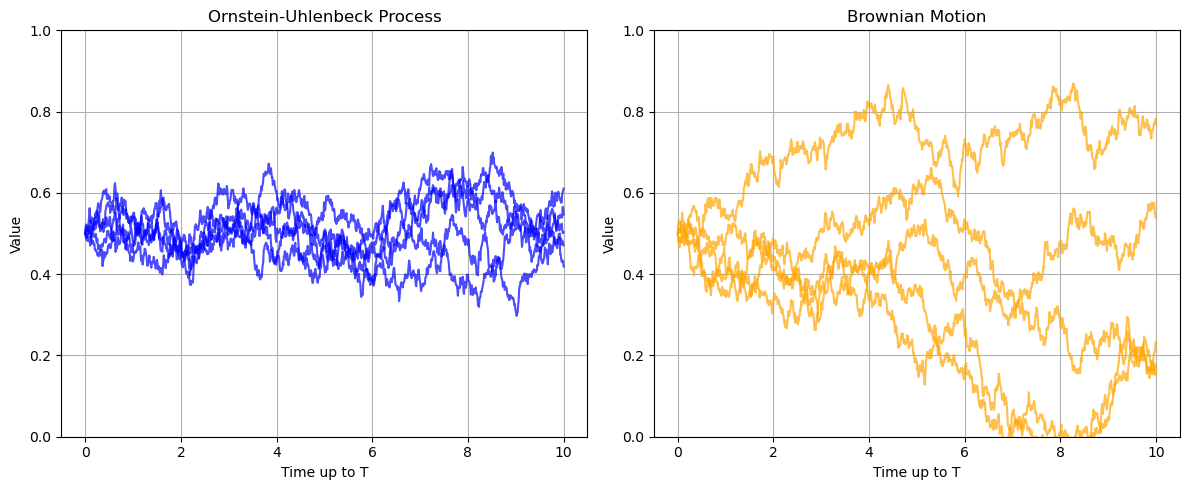

In [3]:
plt.figure(figsize=(12, 5))

# Ornstein-Uhlenbeck process
plt.subplot(1, 2, 1)
for _ in range(5):
    OU_path = OU(T=10, k=1.0, theta=0.5, rho=0.5, sigma=0.1, n=1000)
    plt.plot(np.linspace(0,10,1001),OU_path, color='blue', alpha=0.7)
plt.title('Ornstein-Uhlenbeck Process')
plt.xlabel('Time up to T')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.grid(True)

# Brownian motion
plt.subplot(1, 2, 2)
for _ in range(5):
    BM_path = BM(T=10, rho=0.5, sigma=0.1, n=1000)
    plt.plot(np.linspace(0,10,1001), BM_path, color='orange', alpha=0.7)
plt.title('Brownian Motion')
plt.xlabel('Time up to T')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.grid(True)

plt.tight_layout()
plt.show()
